<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-Python/blob/main/CHAPTER_6_EX_PD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 

### 1

In [2]:
A = np.matrix([[-1,-2],[1,0]])

In [3]:
eigenval, eigenvec = np.linalg.eig(A)

In [4]:
print(eigenval)

[-0.5+1.32287566j -0.5-1.32287566j]


In [5]:
print(eigenvec)

[[ 0.81649658+0.j          0.81649658-0.j        ]
 [-0.20412415-0.54006172j -0.20412415+0.54006172j]]


In [6]:
def analytical(t):

    x1 = -1.2247*(0.816496*np.cos(np.sqrt(7)/2*t))*np.exp(-t/2) + 1.38894*0.816496*np.sin(np.sqrt(7)/2*t)*np.exp(-t/2)
    x2 = -1.2247*(-0.2041*np.cos(np.sqrt(7)/2*t) - 0.540*np.sin(np.sqrt(7)/2*t))*np.exp(-t/2) + 1.38894*(0.5400*np.cos(np.sqrt(7)/2*t) - 0.2041*np.sin(np.sqrt(7)/2*t))*np.exp(-t/2)

    return [x1, x2]

In [7]:
t = np.linspace(0,10,100)
x1, x2 = analytical(t)

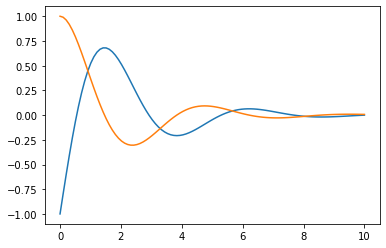

In [8]:
plt.plot(t,x1, t, x2)

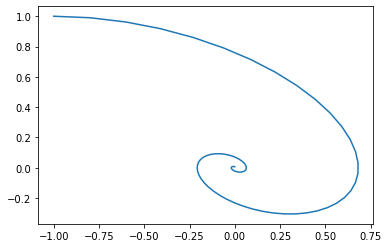

In [9]:
plt.plot(x1,x2)

In [10]:
def numerical(s,t):

    # state variables
    x1 = s[0]
    x2 = s[1]

    # odes
    dx1dt = -x1 - 2*x2
    dx2dt = x1

    return [dx1dt, dx2dt]

In [11]:
# initial conditions
s = [-1, 1]

In [12]:
out = odeint(numerical, s, t)

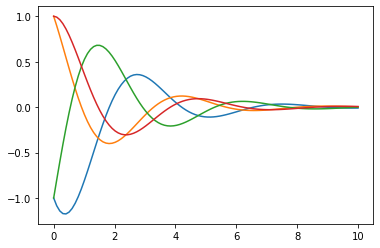

In [13]:
plt.plot(t,out, t, x1, t ,x2)

### 2

In [14]:
A = np.matrix([[0, 0.9056],[-0.7500, -2.5640]])

In [15]:
eigenval, eigenvec = np.linalg.eig(A)

In [16]:
print(eigenval)

[-0.3   -2.264]


In [17]:
print(eigenvec)

[[ 0.94926867 -0.37139068]
 [-0.31446621  0.92847669]]


In [18]:
def analytical(t):

    c1 = -0.728436
    c2 = 0.8303185

    x1 = c1*np.array(eigenvec[0,0])*np.exp(-0.3*t) + c2*np.array(eigenvec[0,1])*np.exp(-2.264*t)
    x2 = c1*np.array(eigenvec[1,0])*np.exp(-0.3*t) + c2*np.array(eigenvec[1,1])*np.exp(-2.264*t)

    return [x1, x2]

In [19]:
x1, x2 = analytical(t)

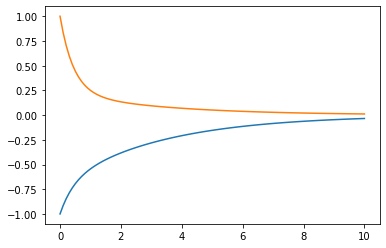

In [20]:
plt.plot(t,x1,t,x2)

In [21]:
def numerical(s,t):

    # state variables 
    x1 = s[0]
    x2 = s[1]

    # odes 
    dx1dt = 0.9056*x2
    dx2dt = -0.7500*x1 - 2.5640*x2

    return [dx1dt, dx2dt]

In [22]:
s = [1, -1]

In [23]:
out = odeint(numerical,s,t)

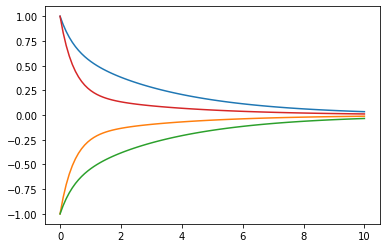

In [24]:
plt.plot(t,out, t, x1, t, x2)

### 8

In [25]:
A = np.matrix([[0,-1.0],[1.0,0.0]])

In [26]:
eigenval, eigenvec = np.linalg.eig(A)

In [27]:
print(eigenval)

[0.+1.j 0.-1.j]


In [28]:
print(eigenvec)

[[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


In [29]:
def analytical(t):

    x1 = 0.5*np.cos(t) + 0.25*np.sin(t)
    x2 = -0.25*np.cos(t) + 0.5*np.sin(t)

    return [x1, x2]

In [30]:
x1, x2 = analytical(t)

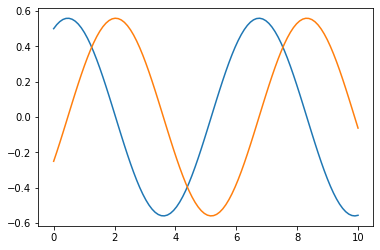

In [31]:
plt.plot(t,x1,t,x2)

In [32]:
def numerical(s,t):

    # state variables
    x1 = s[0]
    x2 = s[1]

    # odes
    dx1dt = -x2
    dx2dt = x1

    return [dx1dt, dx2dt]

In [33]:
# initial conditions 
s = [0.5, -0.25]

In [34]:
out = odeint(numerical, s, t)

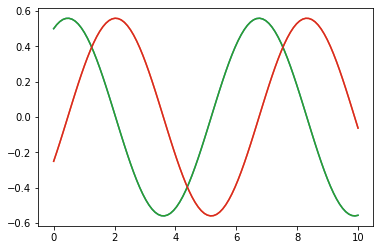

In [35]:
plt.plot(t,out,t,x1,t,x2)

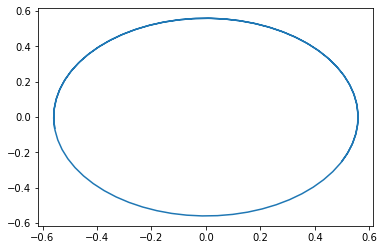

In [36]:
plt.plot(x1,x2)

In [37]:
A = np.matrix([[-3,0],[0,-1]])

In [38]:
eigenval, eigenvec = np.linalg.eig(A)

In [39]:
print(eigenval)

[-3. -1.]


In [40]:
print(eigenvec)

[[1. 0.]
 [0. 1.]]


### 17

In [41]:
def reactor(s,t):

    # state variables 
    ca = s[0]
    cb = s[1]
    cc = s[2]

    # component balance for A 
    dcadt = -k1*ca
    
    # component balance for B
    dcbdt = k1*ca - k2*cb
    
    # component balance for C
    dccdt = k2*cb

    return [dcadt, dcbdt, dccdt]

In [42]:
# initial conditions 
s = [1.5, 0, 0]

In [58]:
# parameter values 
k1 = 1 # min-1
k2 = 7.5 # min-1

In [59]:
# integration time 
t = np.linspace(0,5,100)

In [60]:
out2 = odeint(reactor, s, t)

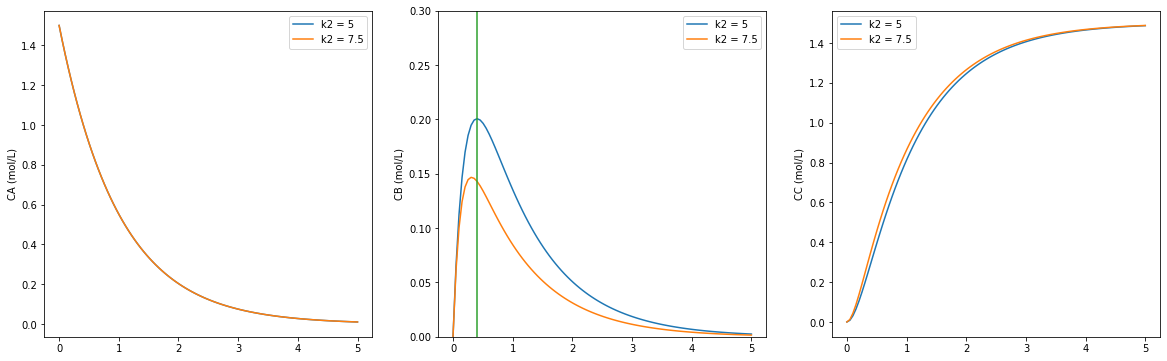

In [68]:
plt.figure(figsize= (20,6))
plt.xlabel("Time (min)")
plt.subplot(1,3,1)
plt.plot(t, out1[:,0], t, out2[:,0])
plt.ylabel("CA (mol/L)")
plt.legend(["k2 = 5", "k2 = 7.5"])
plt.subplot(1,3,2)
plt.ylim(0,0.3)
plt.plot(t, out1[:,1], t, out2[:,1], [0.4023,0.4023], plt.ylim())
plt.ylabel("CB (mol/L)")
plt.legend(["k2 = 5", "k2 = 7.5"])
plt.subplot(1,3,3)
plt.plot(t, out1[:,2], t, out2[:,2])
plt.ylabel("CC (mol/L)")
plt.legend(["k2 = 5", "k2 = 7.5"])

### 16

In [74]:
def production(t):

    cbca = k*t*np.exp(-k*t)

    return cbca

In [95]:
k = 1

In [96]:
cbca = production(t)

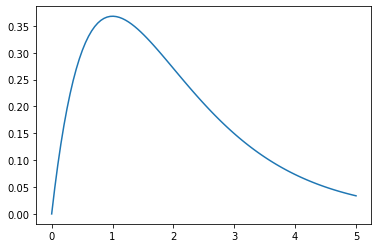

In [97]:
plt.plot(t,cbca)

In [98]:
from scipy.optimize import minimize

def production2(t):

    cbca = - k*t*np.exp(-k*t)

    return cbca

In [99]:
res = minimize(production2, 2, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: -0.367879
         Iterations: 30
         Function evaluations: 60


In [100]:
res.x

array([1.])

In [101]:
k = 1.5 

In [105]:
cbca = production(t)
cbca_sp = production(res.x)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


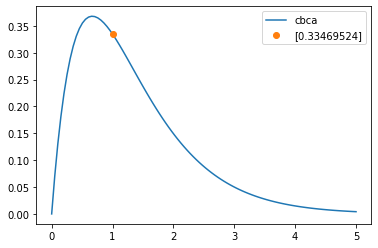

In [114]:
plt.plot(t,cbca)
plt.plot(res.x, cbca_sp, "o")
plt.legend(["cbca",cbca_sp])

### 20

In [130]:
Fs = 10
cf = 5 
k = 1
Vs = 1
t = np.linspace(0,10,100)

In [136]:
def fed_react(s,t,F):

    # state variables 
    V = s[0]
    c = s[1]

    # mass balance 
    dVdt = F

    # component balance 
    dcdt = F/V*(cf - c) - k*c

    return [dVdt, dcdt]

In [137]:
# initial conditions 
s = [1, 0.2]

In [143]:
# inputs 
F = np.ones(len(t))*0
F[0:20] = Fs

In [147]:
# initial conditions 
s = [1, 0.2]
# states 
V = np.ones(len(t))*s[0]
c = np.ones(len(t))*s[1]

# for to change F
for i in range(len(t)-1):

    # update ts 
    ts = [t[i], t[i+1]]

    # solve odes 
    out = odeint(fed_react, s, t, args=(F[i+1],))

    # save states
    V[i+1] = out[-1][0]
    c[i+1] = out[-1][1]

    # update initial conditions 
    s = out[-1]

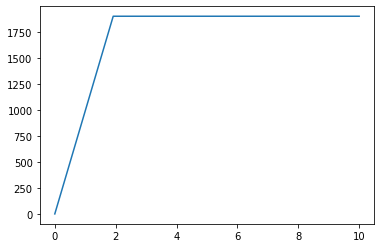

In [148]:
plt.plot(t,V)

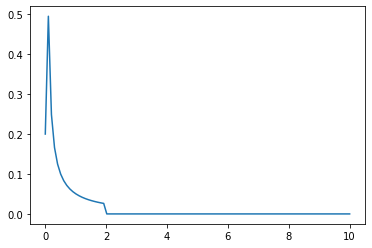

In [149]:
plt.plot(t,c)

In [27]:
x = np.linspace(-2,2,100)

In [36]:
def inp_out(x):

    #u = x + x**3
    u = -x + x**3
    return(u)

In [37]:
u2 = inp_out(x)

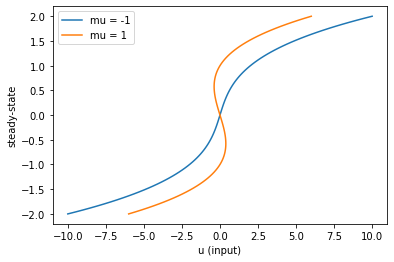

In [39]:
plt.plot(u1,x)
plt.plot(u2,x)
plt.xlabel("u (input)")
plt.ylabel("steady-state")
plt.legend(["mu = -1", "mu = 1"])